<a href="https://colab.research.google.com/github/MayMon-T3807/MMDT_2025_MLAI101/blob/mmdt_091/Lab2_LinearModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('/content/sample_data/Advertising.csv')

X=df[['TV', 'radio', 'newspaper']].values
y=df['sales'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                    test_size = 0.3, random_state=42)

print(X_train.shape, X_test.shape)


(140, 3) (60, 3)


In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


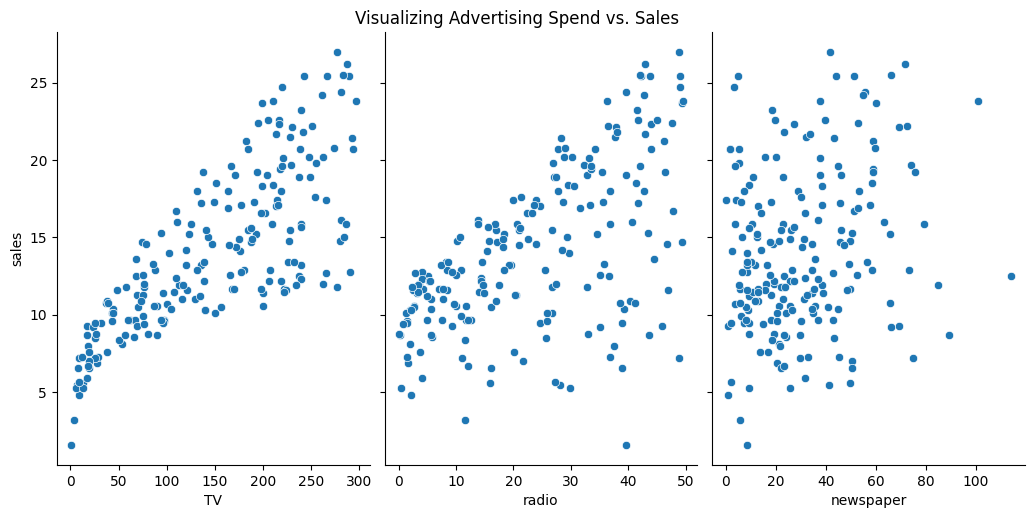

In [9]:
sns.pairplot(df, x_vars=["TV", "radio", "newspaper"], y_vars="sales", height=5, aspect=0.7)
plt.suptitle("Visualizing Advertising Spend vs. Sales", y=1.02)
plt.show()

In [ ]:
# from the visualization we can see TV and radio has better sales

In [11]:
## feature scaling
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_scaled = scale.fit_transform(X_train)
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [12]:
## linear regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_scaled, y_train)

print(lr.coef_, lr.intercept_)


[3.68334078 2.90625242 0.14194772] 14.497142857142856


In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X_test_scaled = scale.transform(X_test)
ytest_pred = lr.predict(X_test_scaled)
mae = mean_absolute_error(y_test, ytest_pred)
print('Mean absolute error: ', mae)

mse = mean_squared_error(y_test, ytest_pred)
print('Mean squared error: ', mse)

r2 = r2_score(y_test, ytest_pred)
print('R2 score is: ', r2)

Mean absolute error:  1.5116692224549082
Mean squared error:  3.796797236715221
R2 score is:  0.8609466508230368


In [ ]:
ytrain_pred = lr.predict(X_scaled)
mae = mean_absolute_error(y_train, ytrain_pred)
print('Mean absolute error: ', mae)

mse = mean_squared_error(y_train, ytrain_pred)
print('Mean squared error: ', mse)

r2 = r2_score(y_train, ytrain_pred)
print('R2 score is: ', r2)

Mean absolute error:  1.1581502948072526
Mean squared error:  2.4793551789057866
R2 score is:  0.9055159502227753
